In [4]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import sys
sys.path.append('../src')

%load_ext autoreload
%autoreload 1

from models.EDA import create_ydf
from models.models import evaluate_model
from models.plot import plot_confusion_matrix, plot_LSA, plot_correct_per_publisher
%aimport models.plot

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
DATA_PATH = '../data/'
DATA_INTERIM_PATH = DATA_PATH + 'interim/'
DATA_PROCESSED_PATH = DATA_PATH + 'processed/'

In [6]:
DATA_PATH = '../data/'
DATA_INTERIM_PATH = DATA_PATH + 'interim/'
cols = ['tokens', 'preprocessed_text', 'hyperpartisan', 'HP_links_count', 'nonHP_links_count']
train = pd.read_csv(DATA_INTERIM_PATH + 'train_p.csv', usecols=cols)
val = pd.read_csv(DATA_INTERIM_PATH + 'val_p.csv', usecols=cols)

In [7]:
with open(DATA_PROCESSED_PATH + "inferred_doc_vectors_train.txt", "rb") as internal_filename:
    X_train = pickle.load(internal_filename)

In [8]:
with open(DATA_PROCESSED_PATH + "inferred_doc_vectors_test.txt", "rb") as internal_filename:
    X_test = pickle.load(internal_filename)

In [9]:
with open(DATA_PROCESSED_PATH + "targets_train.txt", "rb") as internal_filename:
    y_train = pickle.load(internal_filename)

In [10]:
with open(DATA_PROCESSED_PATH + "targets_test.txt", "rb") as internal_filename:
    y_test = pickle.load(internal_filename)

#### Baseline

In [11]:
lr = LogisticRegression(n_jobs=-1, random_state=1)
lr = lr.fit(X_train, y_train)

/Users/jmill/anaconda3/envs/SemEval2019-4/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jmill/anaconda3/envs/SemEval2019-4/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [12]:
predictions = lr.predict(X_test)

In [13]:
evaluate_model(y_test, predictions)

              precision    recall  f1-score   support

       False       0.62      0.40      0.48     75000
        True       0.56      0.76      0.64     75000

   micro avg       0.58      0.58      0.58    150000
   macro avg       0.59      0.58      0.56    150000
weighted avg       0.59      0.58      0.56    150000

Accuracy: 0.5777


0.57766

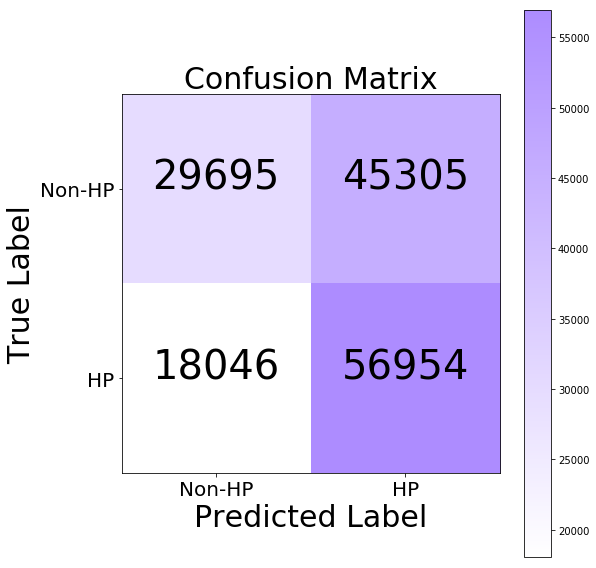

In [14]:
plot_confusion_matrix(y_test, predictions)